In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Regression Model**

In [5]:
df=pd.read_csv('/content/Salary_dataset.csv')

In [6]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [8]:
df['Unnamed: 0'].nunique()

30

In [9]:
#Since all the values in the column 'Unnamed: 0' is unique there will be no impact in the model
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [11]:
#There is no missing value in the dataset
#so let's find the outliers of the column 'YearsExperience'.
#Salary is our target variable so it's not necessary to find it's outliers

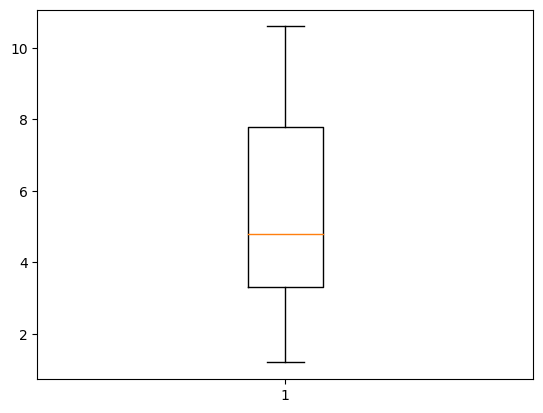

In [12]:
plt.boxplot(df['YearsExperience'])
plt.show()

In [13]:
#There is no outliers in the column 'YearsExperience'.
#Since no columns are in object type no need of encoding

In [14]:
x=df.drop('Salary',axis=1)
y=df['Salary']

In [15]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# **Linear Regression Model**

In [16]:
#Creating Linear model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [17]:
#Training the model
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
#predicting the value of x_test
pred=lr.predict(x_test)

In [19]:
#check the model's efficiency
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [20]:
#Mean absolute error
print(mean_absolute_error(y_test,pred))

6286.453830757745


In [21]:
#Mean Squared Error
print(mean_squared_error(y_test,pred))

49830096.855908394


In [22]:
#r2_scored value
print(r2_score(y_test,pred))

0.9024461774180497


In [23]:
#If the r2_score value is close to 1 it is considered as a good model

# **Polynomial Regression Model**

In [24]:
#Creating polynomial model
from sklearn.preprocessing import PolynomialFeatures
#transform data for polynomial regression
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
lr2=LinearRegression()
lr2.fit(x_train_poly,y_train)

LinearRegression()

In [25]:
#predicting the value of x_test
y_pread_poly=lr2.predict(x_test_poly)

In [26]:
#Mean absolute error
print(mean_absolute_error(y_test,y_pread_poly))

6381.371429702194


In [27]:
#Mean Squared Error
print(mean_squared_error(y_test,y_pread_poly))

52527916.3687748


In [28]:
#r2_scored value
print(r2_score(y_test,y_pread_poly))

0.8971645780890873


# **Classification Model**

In [55]:
data=pd.read_csv('/content/Loan_Default.csv')

In [52]:
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [32]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [33]:
data.shape

(148670, 34)

In [34]:
data.isna().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [35]:
for cols in data.columns:
    print(f"{cols} : \n {data[cols].nunique()} \n") #number of unique vales in each col

ID : 
 148670 

year : 
 1 

loan_limit : 
 2 

Gender : 
 4 

approv_in_adv : 
 2 

loan_type : 
 3 

loan_purpose : 
 4 

Credit_Worthiness : 
 2 

open_credit : 
 2 

business_or_commercial : 
 2 

loan_amount : 
 211 

rate_of_interest : 
 131 

Interest_rate_spread : 
 22516 

Upfront_charges : 
 58271 

term : 
 26 

Neg_ammortization : 
 2 

interest_only : 
 2 

lump_sum_payment : 
 2 

property_value : 
 385 

construction_type : 
 2 

occupancy_type : 
 3 

Secured_by : 
 2 

total_units : 
 4 

income : 
 1001 

credit_type : 
 4 

Credit_Score : 
 401 

co-applicant_credit_type : 
 2 

age : 
 7 

submission_of_application : 
 2 

LTV : 
 8484 

Region : 
 4 

Security_Type : 
 2 

Status : 
 2 

dtir1 : 
 57 



In [36]:
for cols in data.columns:
    print(f"{cols} : \n {data[cols].unique()} \n")

ID : 
 [ 24890  24891  24892 ... 173557 173558 173559] 

year : 
 [2019] 

loan_limit : 
 ['cf' nan 'ncf'] 

Gender : 
 ['Sex Not Available' 'Male' 'Joint' 'Female'] 

approv_in_adv : 
 ['nopre' 'pre' nan] 

loan_type : 
 ['type1' 'type2' 'type3'] 

loan_purpose : 
 ['p1' 'p4' 'p3' 'p2' nan] 

Credit_Worthiness : 
 ['l1' 'l2'] 

open_credit : 
 ['nopc' 'opc'] 

business_or_commercial : 
 ['nob/c' 'b/c'] 

loan_amount : 
 [ 116500  206500  406500  456500  696500  706500  346500  266500  376500
  436500  136500  466500  226500   76500  356500  156500  586500  306500
  316500  336500  426500  476500  196500  186500  246500  216500  506500
  656500  256500  396500  166500  236500  866500  416500  386500  596500
  606500   86500  286500  146500  446500  636500  486500  326500   56500
  906500  496500  106500  126500  296500  176500 1376500  566500  686500
  556500  676500  366500  276500  716500   66500  616500   96500  826500
   26500  666500  546500  986500  526500 1226500  726500 1486500

In [56]:
data= data.drop(columns=['ID'])
#All values in ID was unique.So there will no impact in the model

In [79]:
data= data.drop(columns=['year'])
#All values in Year was same.So there will no impact in the model

Missing value handling

In [57]:
freqgrph=data.select_dtypes(include=['float','int'])

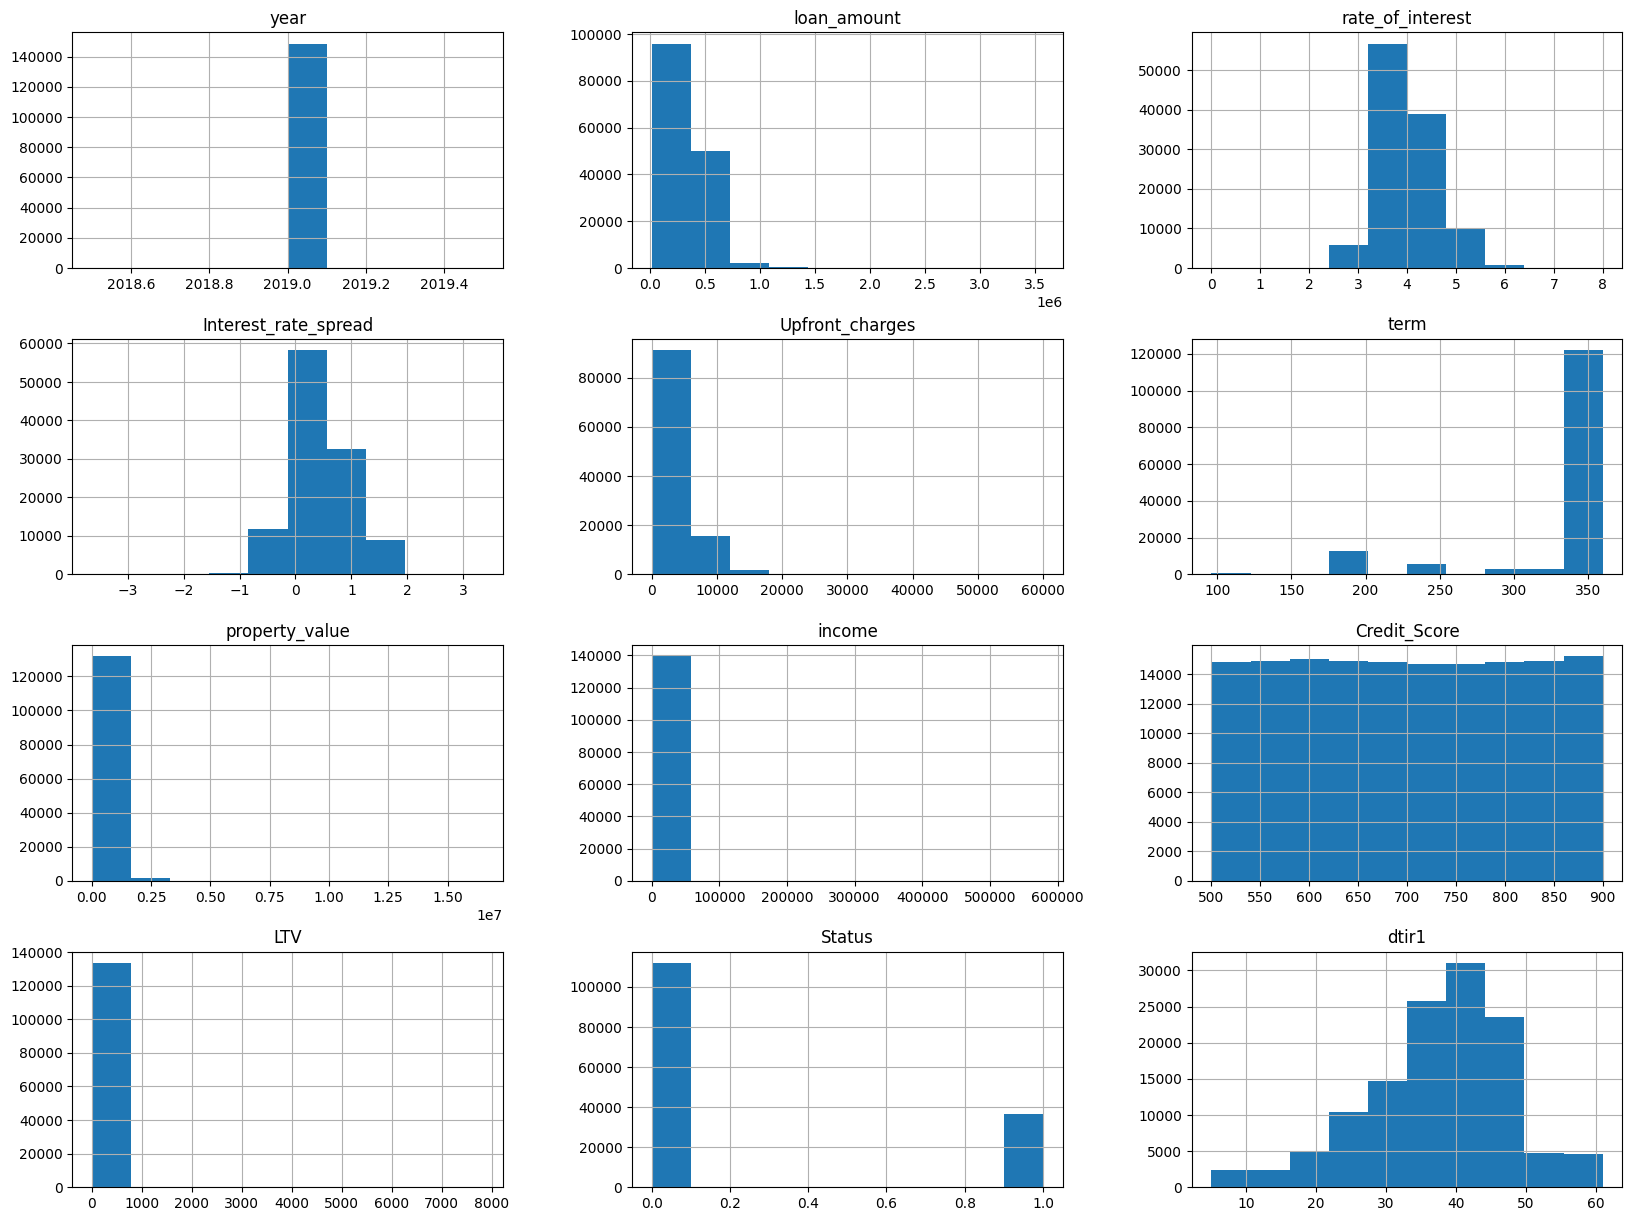

In [39]:
freqgrph.hist(figsize=(20,15))
plt.show()

In [58]:
#Some of the columns are skewed some are not. We are using median to replacing the missing values here.
missing_val_col_num=['rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','LTV','dtir1']
for col in missing_val_col_num:
       data[col]=data[col].fillna(data[col].median())

In [59]:
#We are using mode to replacing the missing values in object columns.
missing_val_col_obj=['loan_limit','approv_in_adv','loan_purpose','Neg_ammortization','age','submission_of_application']
for col in missing_val_col_obj:
       data[col]=data[col].fillna(data[col].mode()[0])

In [66]:
data['Gender']=data['Gender'].replace('Sex Not Available',pd.NA)

In [67]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [68]:
data.isna().sum()

,0
year,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0
loan_amount,0


In [80]:
object_columns = data.select_dtypes(include= [int,float]).columns
object_columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

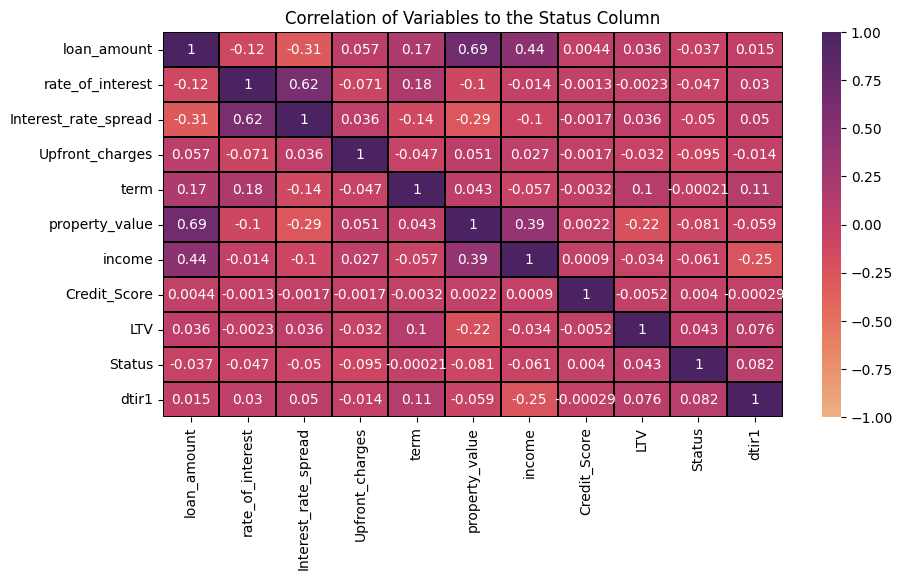

In [85]:
plt.figure(figsize=(10,5))
corr=data[['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1']].corr()
sns.heatmap(corr,annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black', cmap= 'flare')
plt.title('Correlation of Variables to the Status Column')
plt.show()

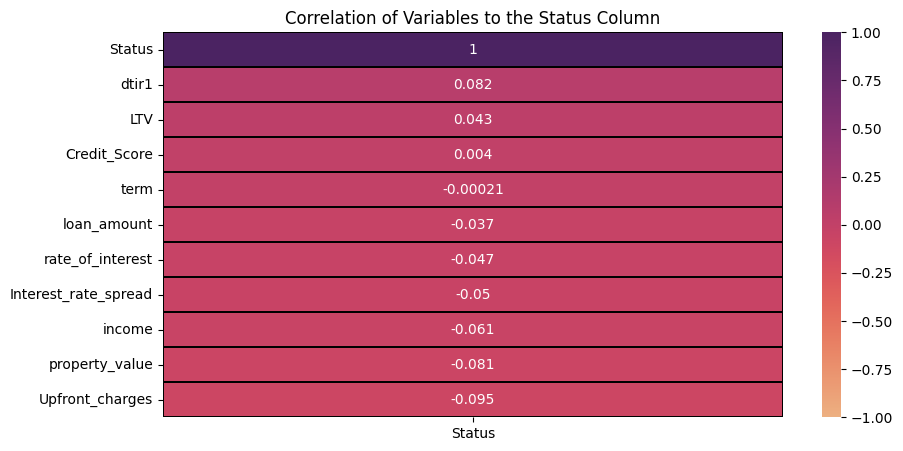

In [86]:
plt.figure(figsize=(10,5))
sns.heatmap(data[['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1']].corr()['Status'].sort_values(ascending=False).to_frame(),
            annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black', cmap= 'flare')
plt.title('Correlation of Variables to the Status Column')
plt.show()

In [87]:
data= data.drop(columns=['loan_amount','rate_of_interest'])
#By checking the correlation we are droping some columns

Outlier Handling

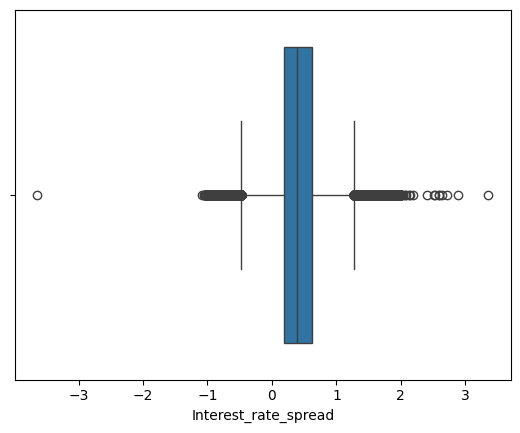

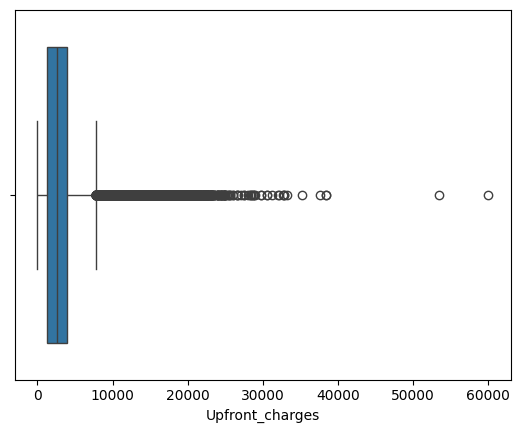

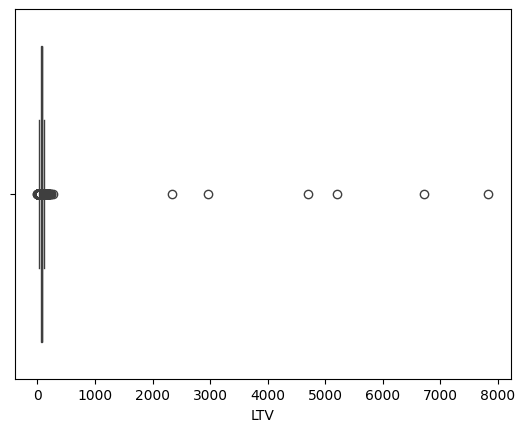

In [88]:
large_unique_col=['Interest_rate_spread','Upfront_charges','LTV']
for cols in large_unique_col:
    sns.boxplot(data=data[cols] ,orient= "h")
    plt.show()

In [89]:
for col in large_unique_col:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers= ((data[col] < lower_bound) | (data[col] > upper_bound))
    data[col] = data[col].where(~outliers, np.median(data[col]))

Encoding

In [122]:
data1=data.copy()

In [123]:
categorical_columns = data1.select_dtypes(include= object).columns
categorical_columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [124]:
for cols in categorical_columns:
    print(f"{cols} : \n {data1[cols].unique()} \n")

loan_limit : 
 ['cf' 'ncf'] 

Gender : 
 ['Male' 'Joint' 'Female'] 

approv_in_adv : 
 ['nopre' 'pre'] 

loan_type : 
 ['type1' 'type2' 'type3'] 

loan_purpose : 
 ['p1' 'p4' 'p3' 'p2'] 

Credit_Worthiness : 
 ['l1' 'l2'] 

open_credit : 
 ['nopc' 'opc'] 

business_or_commercial : 
 ['nob/c' 'b/c'] 

Neg_ammortization : 
 ['not_neg' 'neg_amm'] 

interest_only : 
 ['not_int' 'int_only'] 

lump_sum_payment : 
 ['not_lpsm' 'lpsm'] 

construction_type : 
 ['sb' 'mh'] 

occupancy_type : 
 ['pr' 'sr' 'ir'] 

Secured_by : 
 ['home' 'land'] 

total_units : 
 ['1U' '2U' '3U' '4U'] 

credit_type : 
 ['EXP' 'EQUI' 'CRIF' 'CIB'] 

co-applicant_credit_type : 
 ['CIB' 'EXP'] 

age : 
 ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25'] 

submission_of_application : 
 ['to_inst' 'not_inst'] 

Region : 
 ['south' 'North' 'central' 'North-East'] 

Security_Type : 
 ['direct' 'Indriect'] 



In [125]:
#label encoding on data1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [126]:
for i in ['loan_limit','approv_in_adv','Credit_Worthiness','open_credit','business_or_commercial','Neg_ammortization',
          'interest_only','lump_sum_payment','construction_type','Secured_by','co-applicant_credit_type',
          'submission_of_application','Security_Type']:
  data1[i]=le.fit_transform(data1[i])

In [127]:
def convert_midpoint (age):
 if '-' in age:
  lower, upper = map(int, age.split('-'))
  return (lower + upper) / 2
 elif '<' in age:
  return float(age.replace('<', '').strip())- 0.5 # Example value
 elif '>' in age:
  return float(age.replace('>', '').strip()) + 0.5 #Example value return np.nan
 return np.nan
data1['age'] = data1['age'].apply(convert_midpoint)

In [128]:
data2=data1[['Gender','loan_type','loan_purpose','occupancy_type','total_units','credit_type','Region']]

In [129]:
data2=pd.get_dummies(data2)
data2.head()

,Gender_Female,Gender_Joint,Gender_Male,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,...,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,Region_North,Region_North-East,Region_central,Region_south
0,False,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,False,False,True,False,True,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,False,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,True,True,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,False
4,False,True,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [130]:
for i in data2:
  data2[i]=data2[i].astype('int64')

In [131]:
data1=data1.drop(columns=['Gender','loan_type','loan_purpose','occupancy_type','total_units','credit_type','Region'])

In [132]:
data1 = pd.concat([data1, data2], axis=1)

In [135]:
data2.columns

Index(['Gender_Female', 'Gender_Joint', 'Gender_Male', 'loan_type_type1',
       'loan_type_type2', 'loan_type_type3', 'loan_purpose_p1',
       'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
       'occupancy_type_ir', 'occupancy_type_pr', 'occupancy_type_sr',
       'total_units_1U', 'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CIB', 'credit_type_CRIF', 'credit_type_EQUI',
       'credit_type_EXP', 'Region_North', 'Region_North-East',
       'Region_central', 'Region_south'],
      dtype='object')

Scaling

In [140]:
#splitting dataset into features and targets
x=data1.drop(columns=['Status'])
y=data1['Status']

In [141]:
#applying min mxa scaling on numerical cols
x1=x.copy()

In [142]:
#dropping the encoded cols from x1
x1.drop(['Gender_Female', 'Gender_Joint', 'Gender_Male', 'loan_type_type1',
       'loan_type_type2', 'loan_type_type3', 'loan_purpose_p1',
       'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
       'occupancy_type_ir', 'occupancy_type_pr', 'occupancy_type_sr',
       'total_units_1U', 'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CIB', 'credit_type_CRIF', 'credit_type_EQUI',
       'credit_type_EXP', 'Region_North', 'Region_North-East',
       'Region_central', 'Region_south','loan_limit','approv_in_adv',
       'Credit_Worthiness','open_credit','business_or_commercial','Neg_ammortization',
       'interest_only','lump_sum_payment','construction_type','Secured_by','co-applicant_credit_type',
       'submission_of_application','Security_Type'],axis=1,inplace=True)

In [143]:
x1.columns

Index(['Interest_rate_spread', 'Upfront_charges', 'term', 'property_value',
       'income', 'Credit_Score', 'age', 'LTV', 'dtir1'],
      dtype='object')

In [144]:
#doing min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1=scaler.fit_transform(x1)

In [145]:
#we have to convert this array into dataframe
x1=pd.DataFrame(x1,columns=['Interest_rate_spread', 'Upfront_charges', 'term', 'property_value',
       'income', 'Credit_Score', 'age', 'LTV', 'dtir1'])

In [146]:
#merging this scaled data
x2=x.drop(['Interest_rate_spread', 'Upfront_charges', 'term', 'property_value',
       'income', 'Credit_Score', 'age', 'LTV', 'dtir1'],axis=1)
x=pd.concat([x1,x2],axis=1)
x.head()

,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,age,LTV,dtir1,loan_limit,...,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,Region_North,Region_North-East,Region_central,Region_south
0,0.494099,0.330842,1.0,0.006667,0.003007,0.6450,0.1,0.788605,0.714286,0,...,0,0,0,0,0,1,0,0,0,1
1,0.494099,0.330842,1.0,0.024848,0.008607,0.1300,0.7,0.513231,0.607143,0,...,0,0,0,0,1,0,1,0,0,0
2,0.385541,0.075815,1.0,0.030303,0.016385,0.8350,0.3,0.570234,0.732143,0,...,0,0,0,0,0,1,0,0,0,1
3,0.659787,0.330842,1.0,0.039394,0.020533,0.2175,0.5,0.446012,0.660714,0,...,0,0,0,0,0,1,1,0,0,0
4,0.444951,0.000000,1.0,0.045455,0.018044,0.2550,0.1,0.708743,0.607143,0,...,0,0,0,1,0,0,1,0,0,0


Logistical Regression

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [154]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=1000)

In [155]:
model=lg.fit(x_train,y_train)

In [156]:
y_pred_lg=lg.predict(x_test)

In [157]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score

In [158]:
print('Accuracy',accuracy_score(y_test,y_pred_lg))

Accuracy 0.866079235891572


In [159]:
print('precision',precision_score(y_test,y_pred_lg))

precision 0.938610662358643


In [160]:
print('recall score',recall_score(y_test,y_pred_lg))

recall score 0.48149171270718233


KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
metrics_k=[]
n=np.arange(3,15)
for k in n:
  clf=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metrics_k.append(acc)

In [163]:
metrics_k

[0.8552498822896347,
 0.8661128674244972,
 0.8615053474137351,
 0.8687024954597431,
 0.8645658169099347,
 0.8671890764781058,
 0.8658774466940203,
 0.8663482881549741,
 0.8658774466940203,
 0.8663482881549741,
 0.866583708885451,
 0.866583708885451]

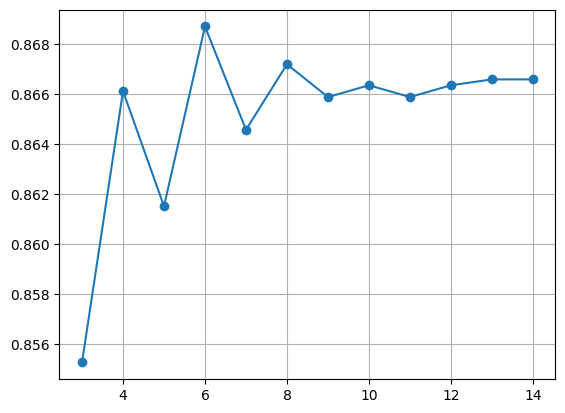

In [164]:
plt.plot(n,metrics_k,'o-')
plt.grid()

In [165]:
clf=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [166]:
print('Accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('recall score',recall_score(y_test,y_pred))

Accuracy 0.8687024954597431
precision 0.8680494263018534
recall score 0.5433701657458564


Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_nb=gnb.predict(x_test)

In [168]:
print('Accuracy',accuracy_score(y_test,y_pred_nb))
print('precision',precision_score(y_test,y_pred_nb))
print('recall score',recall_score(y_test,y_pred_nb))

Accuracy 0.8701150198426044
precision 0.9915599534342259
recall score 0.4705801104972376


Decision Tree

In [169]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred3=dt_clf.predict(x_test)
print('Accuracy is ',accuracy_score(y_test,y_pred3))
print('precision',precision_score(y_test,y_pred3))
print('recall score',recall_score(y_test,y_pred3))

Accuracy is  0.9890361202663618
precision 0.9800055540127742
recall score 0.9748618784530386


Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred4=rf_clf.predict(x_test)
print('Accuracy is ',accuracy_score(y_test,y_pred4))
print('precision',precision_score(y_test,y_pred4))
print('recall score',recall_score(y_test,y_pred4))

Accuracy is  0.9936436402771238
precision 0.9768700121736777
recall score 0.9975138121546961
